In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from flatsurf import *
import os
import pwlf
from surface_dynamics.all import *
from Library import *
from Library import Section
import math
from time import time
import copy
from scipy import integrate
import sympy as sym
from sympy import Symbol, solve, lambdify
import traceback
import dill
import sys
import unittest
from surface_dynamics.all import Origami
from utils import load_arrays_from_file  # testing
import re

from sage.all import *
import numpy as np
from fractions import Fraction as frac
M = mathematica
from IPython.display import display, Math

import sympy as sp
from sympy.parsing.sympy_parser import parse_expr

from mathematica import *
from integration_functions import *

t = sp.Symbol('t')

In [2]:
#0: 
#3: 88.82643960980421
#19:88.82643960980421

n_squares = 7
index = 0

dx = 0.0005

vec_file = "vecs" + str(n_squares) + "-" + str(index) + ".npy"
vecs0 = load_arrays_from_file(os.path.join("vecs", vec_file))

with open(os.path.join("results", f"{n_squares} - {index}", "setup.dill"), 'rb') as f:
    loaded_data = dill.load(f)
a,c,e,g = loaded_data

section 0
['x0 = 2', 'y0 = 1', 'top = 1 - 2*x', 'bottom1 = 1 - 3*x', 'left = 0']
[1, 4]
f$010$000$000


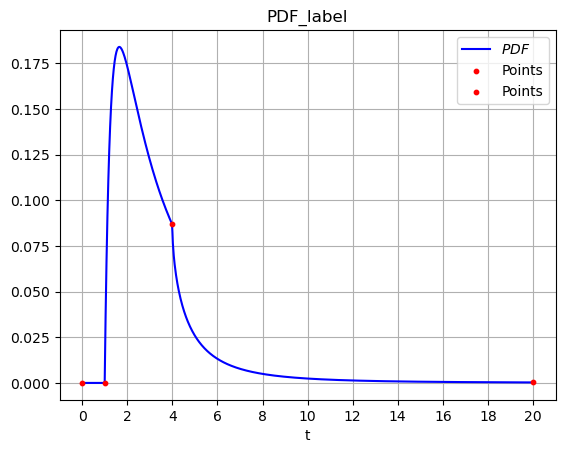

['x0 = 1', 'y0 = 1', 'top = 1 - x', 'bottom1 = 1 - 2*x', 'left = 0']
[1, 4]
f$010$000$000


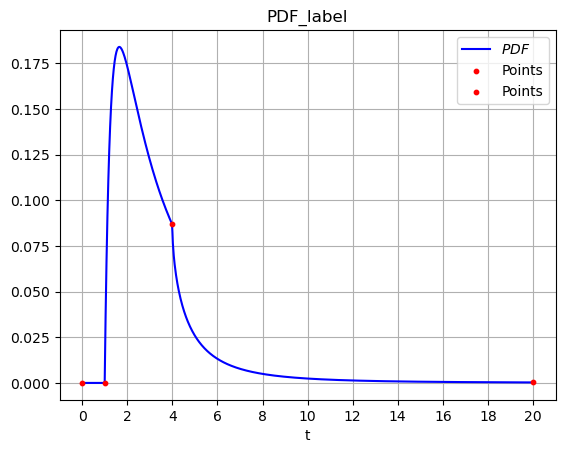

LaTeX file saved: 0
PDF successfully created: 0
section 1
['x0 = 13/7', 'y0 = 2', 'top = 1/2 - 13*x/14', 'bottom1 = 1/2 - 10*x/7', 'bottom2 = 1/3 - 23*x/21', 'point1 = 1/2', 'left = 0']
[2, 6, 8]
f$000$011$000
f$011$111$000


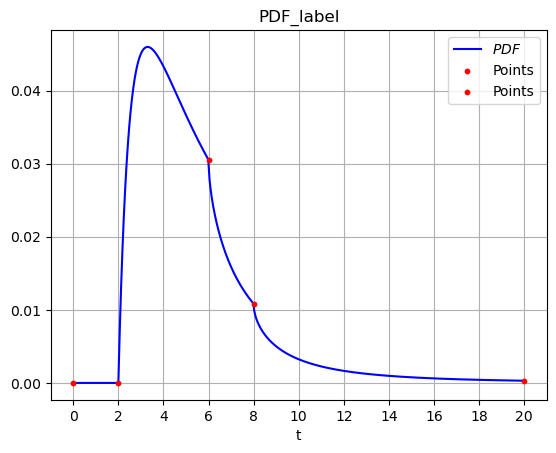

['x0 = 6/7', 'y0 = 2', 'top = 1/2 - 3*x/7', 'bottom1 = 1/2 - 13*x/14', 'left = 0']
[2, 8]
f$010$000$000


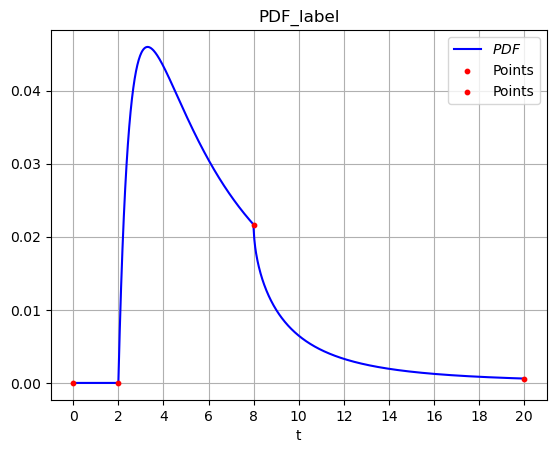

['x0 = 23/7', 'y0 = 3', 'top = 1/3 - 23*x/21', 'bottom1 = 1/2 - 10*x/7', 'left = 1/2']
[3, 16/3, 6]
f$010$000$000
f$111$000$000


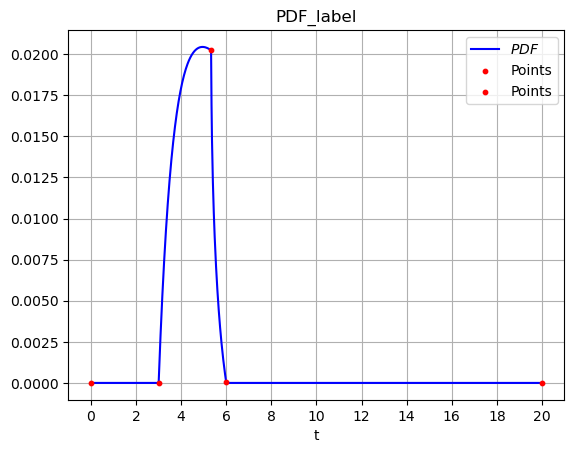

LaTeX file saved: 1
PDF successfully created: 1
section 2
['x0 = 35/22', 'y0 = 1', 'top = 1 - 35*x/22', 'bottom1 = 1 - 79*x/22', 'bottom2 = 1/2 - 23*x/11', 'point1 = 1/3', 'left = 0']
[1, 8, 9]
f$010$010$000
f$011$110$000


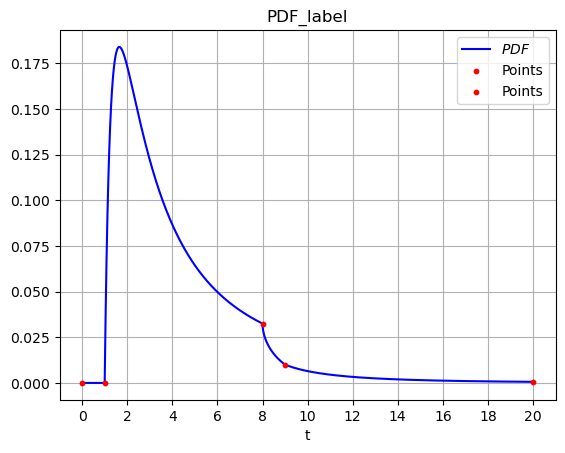

['x0 = 79/22', 'y0 = 1', 'top = 1 - 79*x/22', 'bottom1 = 1 - 101*x/22', 'left = 0']
[1, 4]
f$010$000$000


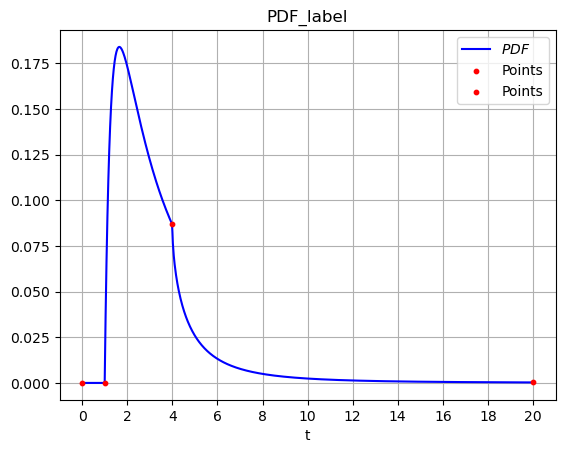

['x0 = 13/22', 'y0 = 1', 'top = 1 - 13*x/22', 'bottom1 = 1 - 35*x/22', 'left = 0']
[1, 4]
f$010$000$000


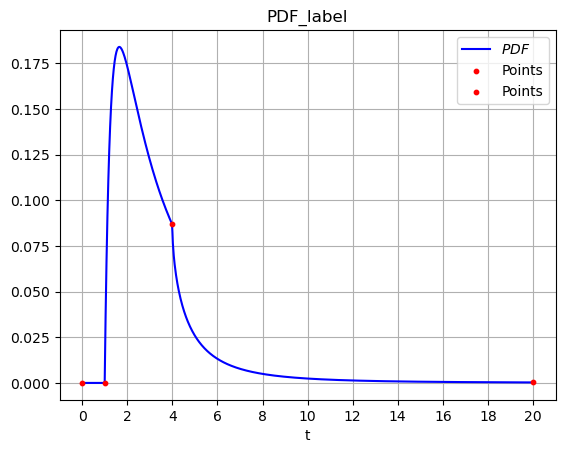

['x0 = 46/11', 'y0 = 2', 'top = 1/2 - 23*x/11', 'bottom1 = 1 - 79*x/22', 'bottom2 = 1/3 - 149*x/66', 'point1 = 1/2', 'left = 1/3']
[2, 6, 8]
f$110$011$000
f$111$111$000


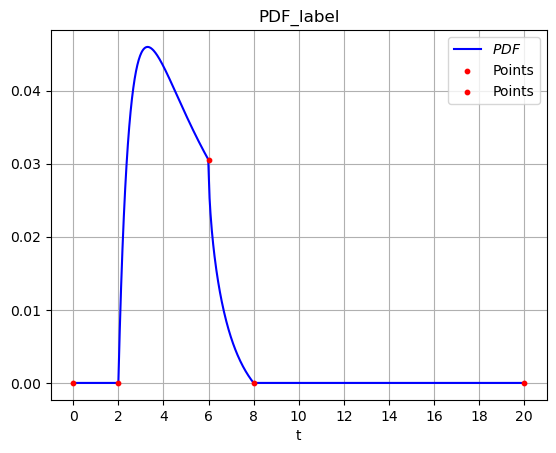

['x0 = 149/22', 'y0 = 3', 'top = 1/3 - 149*x/66', 'bottom1 = 1/2 - 57*x/22', 'left = 1/2']
[3, 16/3, 6]
f$010$000$000
f$111$000$000


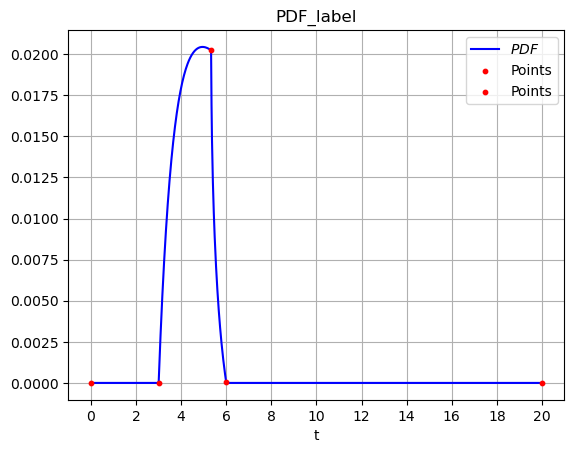

['x0 = 57/11', 'y0 = 2', 'top = 1/2 - 57*x/22', 'bottom1 = 1 - 79*x/22', 'left = 1/2']
[2, 4]
f$110$000$000


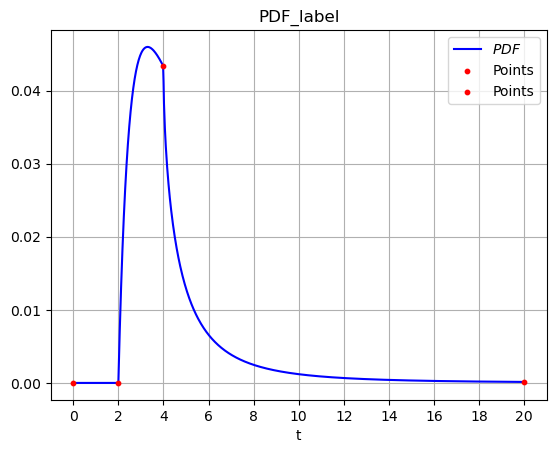

LaTeX file saved: 2
PDF successfully created: 2
section 3
['x0 = 23/14', 'y0 = 1', 'top = 1 - 23*x/14', 'bottom1 = 1 - 37*x/14', 'left = 0']
[1, 4]
f$010$000$000


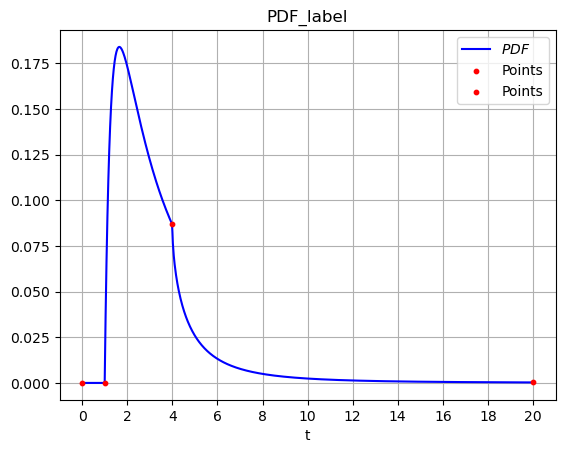

['x0 = 9/14', 'y0 = 1', 'top = 1 - 9*x/14', 'bottom1 = 1 - 23*x/14', 'left = 0']
[1, 4]
f$010$000$000


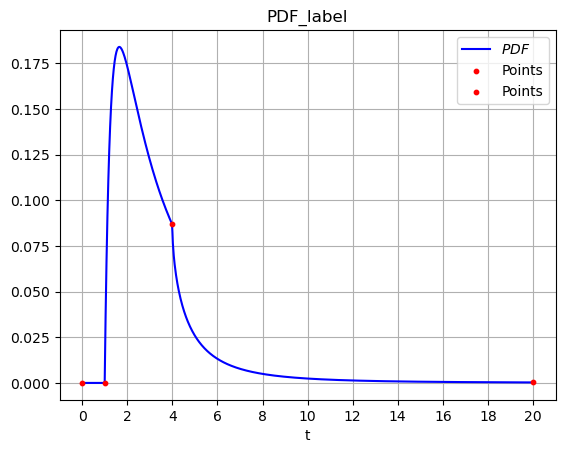

LaTeX file saved: 3
PDF successfully created: 3
section 4
['x0 = 5', 'y0 = 1', 'top = 1 - 5*x', 'bottom1 = 1 - 6*x', 'left = 0']
[1, 4]
f$010$000$000


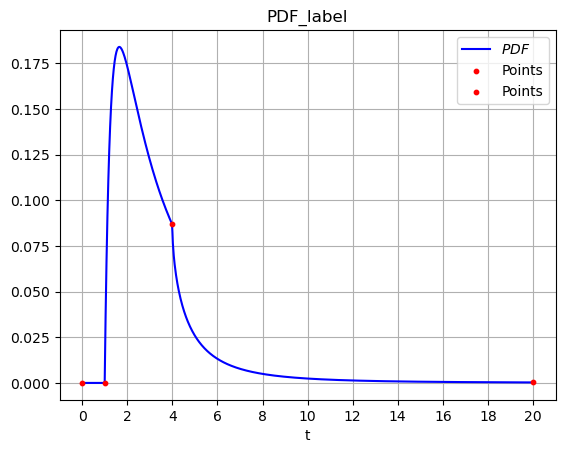

['x0 = 3', 'y0 = 1', 'top = 1 - 3*x', 'bottom1 = 1 - 4*x', 'left = 0']
[1, 4]
f$010$000$000


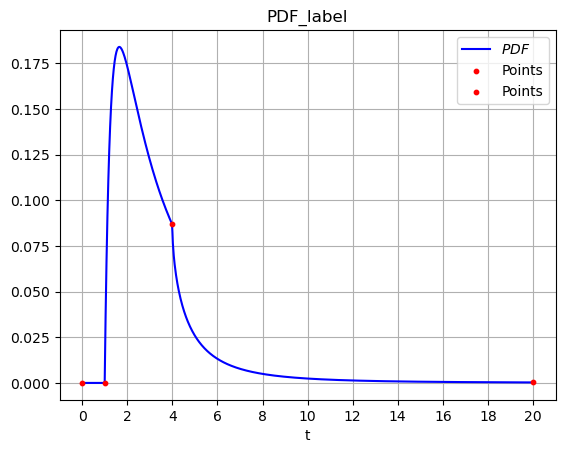

['x0 = 4', 'y0 = 1', 'top = 1 - 4*x', 'bottom1 = 1 - 5*x', 'left = 0']
[1, 4]
f$010$000$000


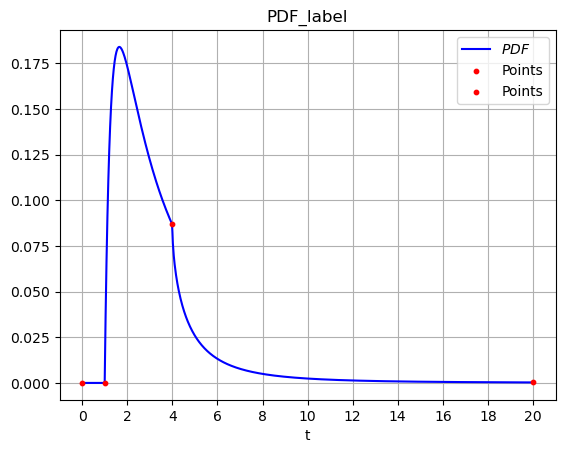

['x0 = 2', 'y0 = 1', 'top = 1 - 2*x', 'bottom1 = 1 - 3*x', 'left = 0']
[1, 4]
f$010$000$000


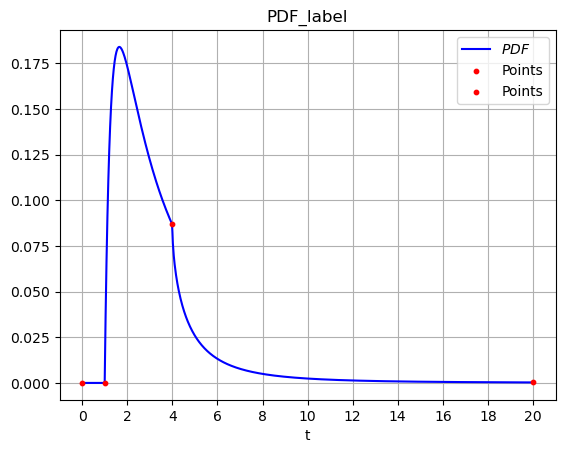

['x0 = 6', 'y0 = 1', 'top = 1 - 6*x', 'bottom1 = 1 - 7*x', 'left = 0']
[1, 4]
f$010$000$000


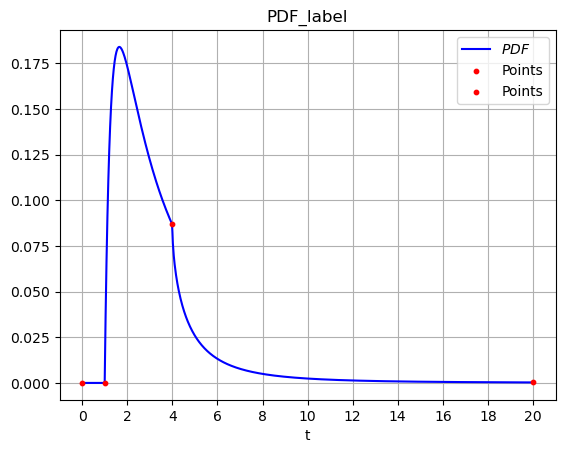

['x0 = 1', 'y0 = 1', 'top = 1 - x', 'bottom1 = 1 - 2*x', 'left = 0']
[1, 4]
f$010$000$000


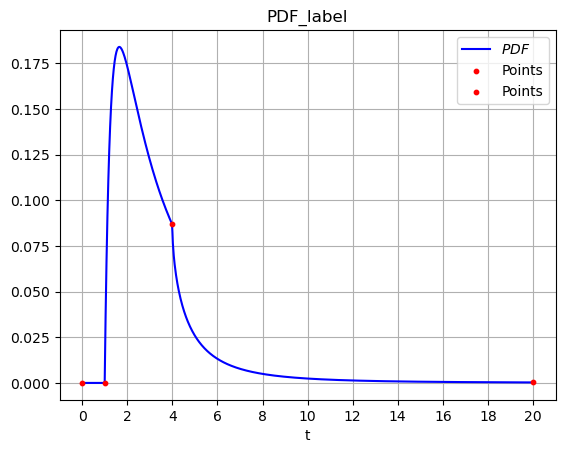

LaTeX file saved: 4
PDF successfully created: 4
section 5
['x0 = 142/49', 'y0 = 1', 'top = 1 - 142*x/49', 'bottom1 = 1 - 191*x/49', 'left = 0']
[1, 4]
f$010$000$000


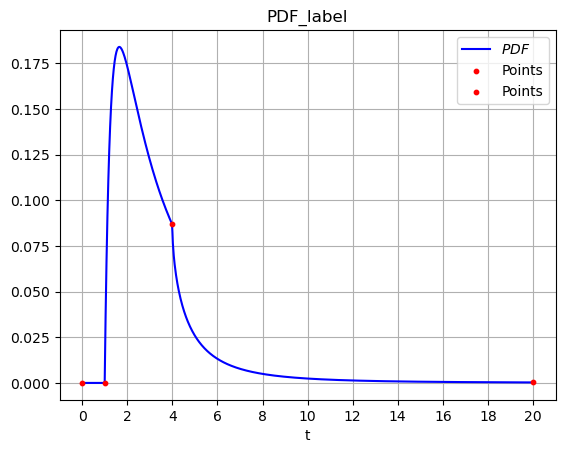

['x0 = 93/49', 'y0 = 1', 'top = 1 - 93*x/49', 'bottom1 = 1 - 142*x/49', 'left = 0']
[1, 4]
f$010$000$000


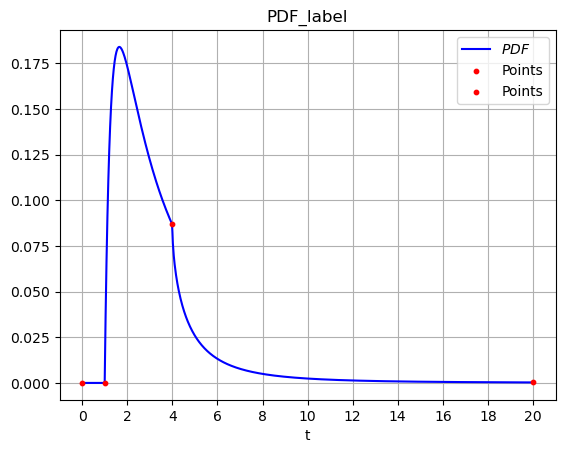

['x0 = 44/49', 'y0 = 1', 'top = 1 - 44*x/49', 'bottom1 = 1 - 93*x/49', 'left = 0']
[1, 4]
f$010$000$000


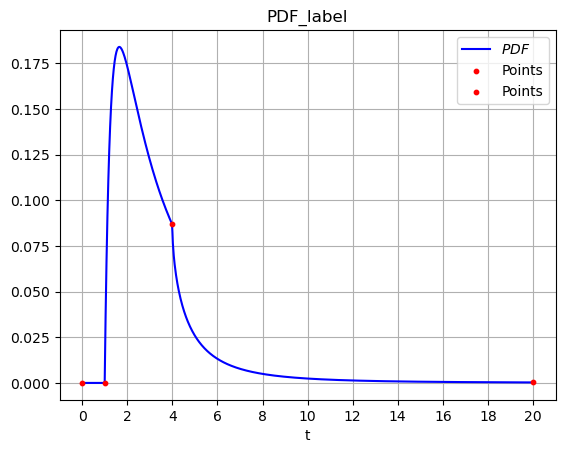

LaTeX file saved: 5
PDF successfully created: 5
section 6
['x0 = 27/8', 'y0 = 2', 'top = 1/2 - 27*x/16', 'bottom1 = 1/2 - 31*x/16', 'left = 0']
[2, 4]
f$011$000$000


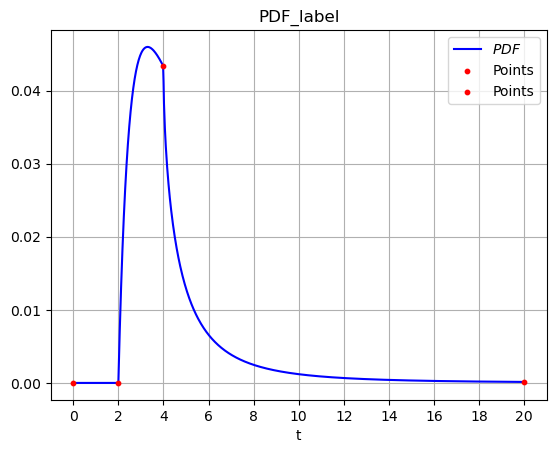

['x0 = 31/8', 'y0 = 2', 'top = 1/2 - 31*x/16', 'bottom1 = 1/2 - 35*x/16', 'left = 0']
[2, 4]
f$011$000$000


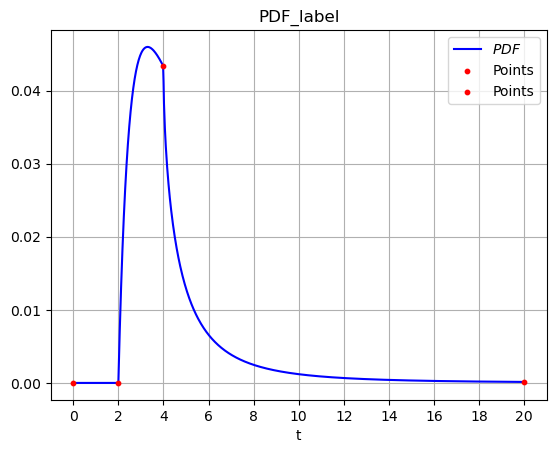

['x0 = 19/8', 'y0 = 2', 'top = 1/2 - 19*x/16', 'bottom1 = 1/2 - 23*x/16', 'left = 0']
[2, 4]
f$011$000$000


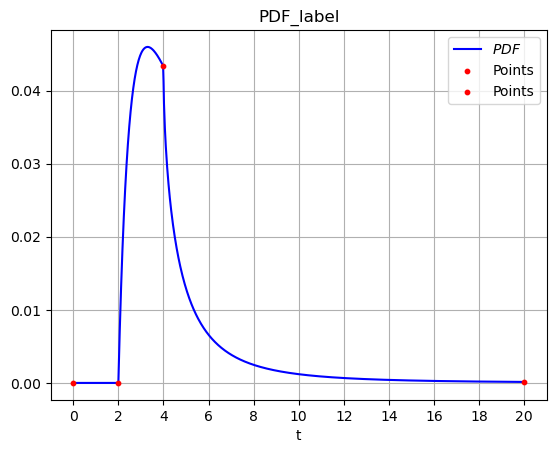

['x0 = 35/8', 'y0 = 2', 'top = 1/2 - 35*x/16', 'bottom1 = 1/2 - 39*x/16', 'left = 0']
[2, 4]
f$011$000$000


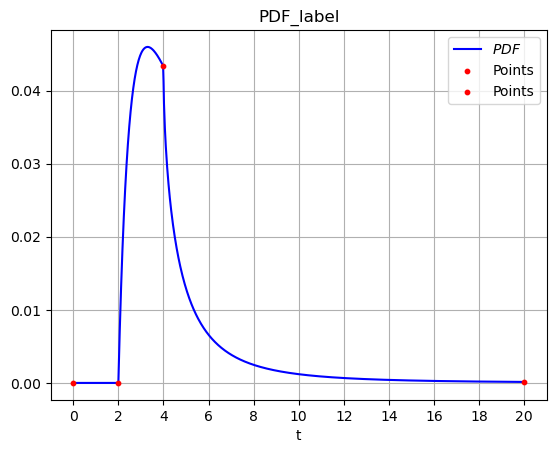

['x0 = 15/8', 'y0 = 2', 'top = 1/2 - 15*x/16', 'bottom1 = 1/2 - 19*x/16', 'left = 0']
[2, 4]
f$011$000$000


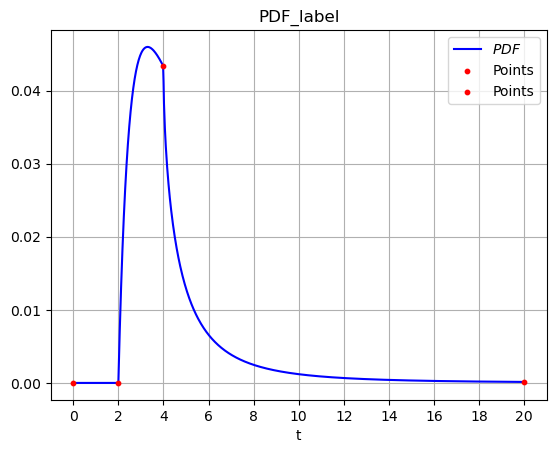

['x0 = 39/8', 'y0 = 2', 'top = 1/2 - 39*x/16', 'bottom1 = 1/2 - 47*x/16', 'bottom2 = 1/4 - 41*x/16', 'point1 = 2/3', 'left = 0']
[2, 8, 9]
f$010$011$000
f$011$111$000


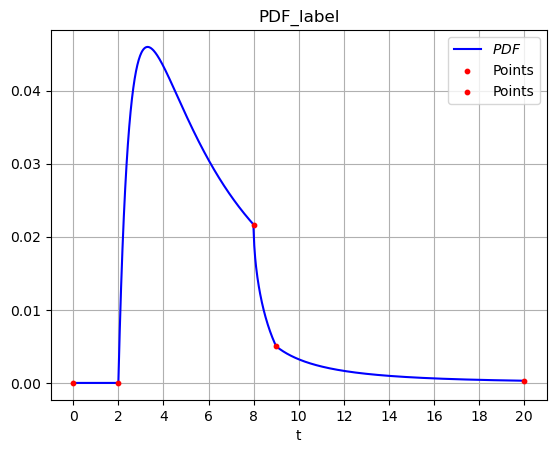

['x0 = 23/8', 'y0 = 2', 'top = 1/2 - 23*x/16', 'bottom1 = 1/2 - 27*x/16', 'left = 0']
[2, 4]
f$011$000$000


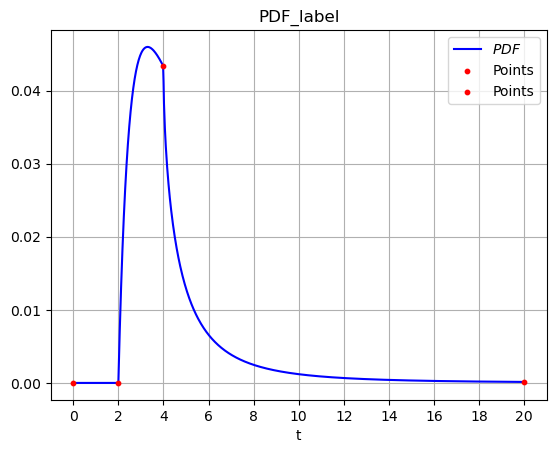

['x0 = 7/8', 'y0 = 2', 'top = 1/2 - 7*x/16', 'bottom1 = 1/2 - 15*x/16', 'left = 0']
[2, 8]
f$010$000$000


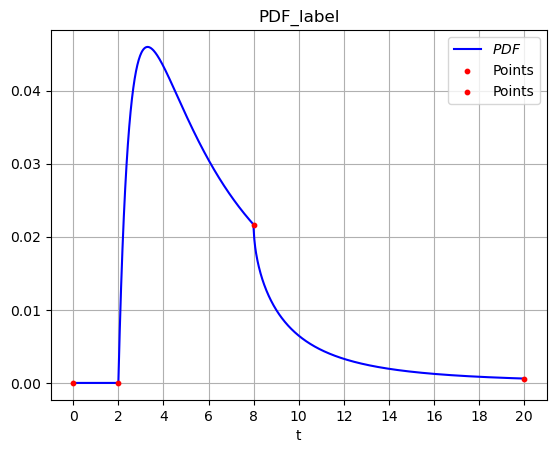

['x0 = 41/4', 'y0 = 4', 'top = 1/4 - 41*x/16', 'bottom1 = 1/2 - 47*x/16', 'left = 2/3']
[4, 6, 8]
f$110$000$000
f$111$000$000


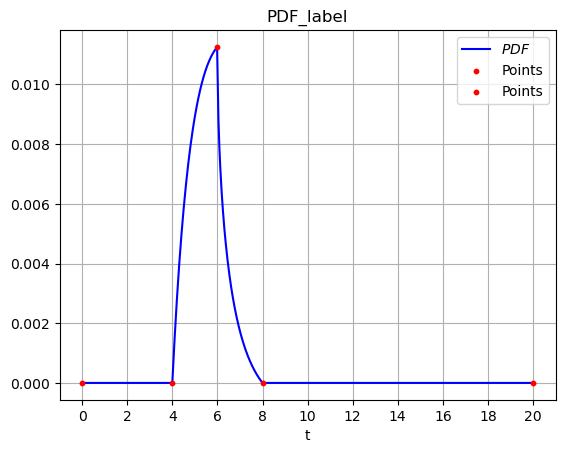

LaTeX file saved: 6
PDF successfully created: 6
section 7
['x0 = 49/5', 'y0 = 1', 'top = 1 - 49*x/5', 'bottom1 = 1 - 54*x/5', 'left = 0']
[1, 4]
f$010$000$000


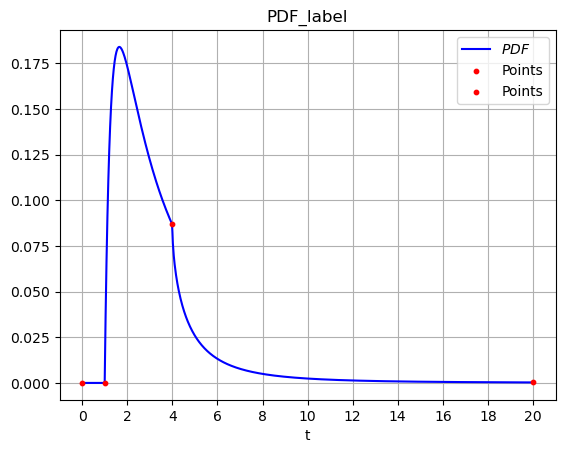

['x0 = 29/5', 'y0 = 1', 'top = 1 - 29*x/5', 'bottom1 = 1 - 34*x/5', 'left = 0']
[1, 4]
f$010$000$000


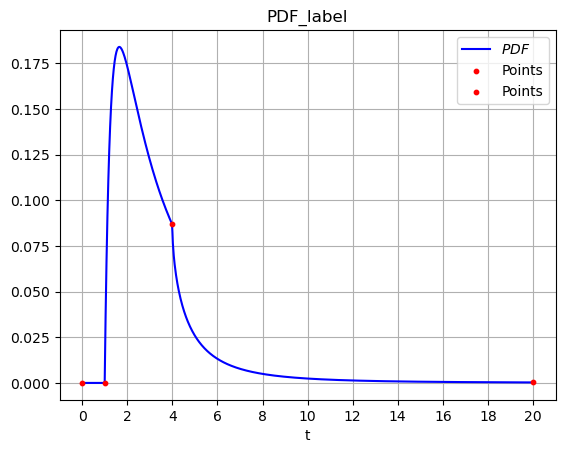

['x0 = 54/5', 'y0 = 1', 'top = 1 - 54*x/5', 'bottom1 = 1 - 59*x/5', 'left = 0']
[1, 4]
f$010$000$000


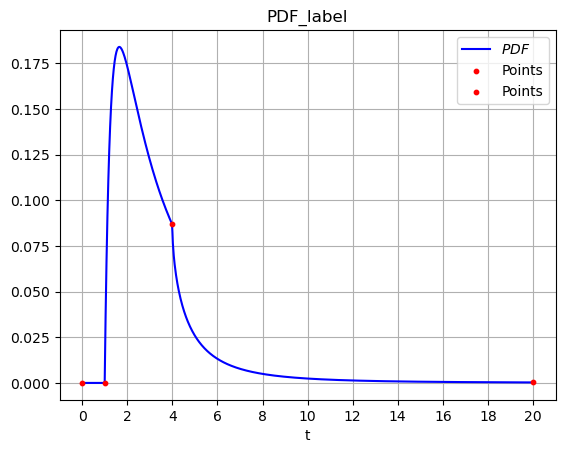

['x0 = 39/5', 'y0 = 1', 'top = 1 - 39*x/5', 'bottom1 = 1 - 44*x/5', 'left = 0']
[1, 4]
f$010$000$000


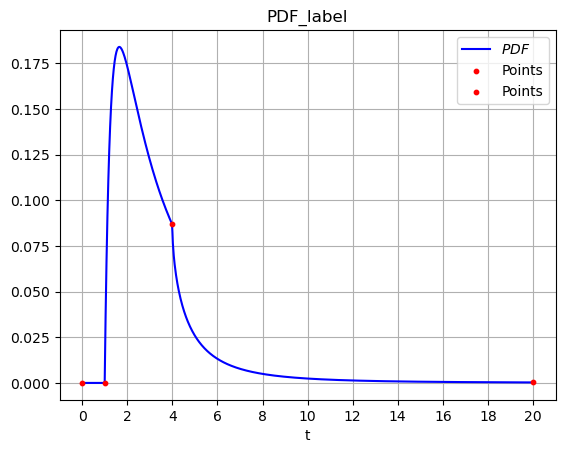

['x0 = 44/5', 'y0 = 1', 'top = 1 - 44*x/5', 'bottom1 = 1 - 49*x/5', 'left = 0']
[1, 4]
f$010$000$000


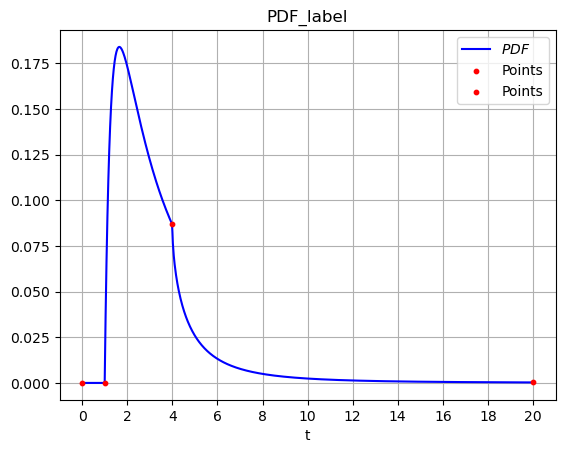

['x0 = 19/5', 'y0 = 1', 'top = 1 - 19*x/5', 'bottom1 = 1 - 29*x/5', 'bottom2 = 1/2 - 43*x/10', 'point1 = 1/3', 'left = 0']
[1, 8, 9]
f$010$010$000
f$011$110$000


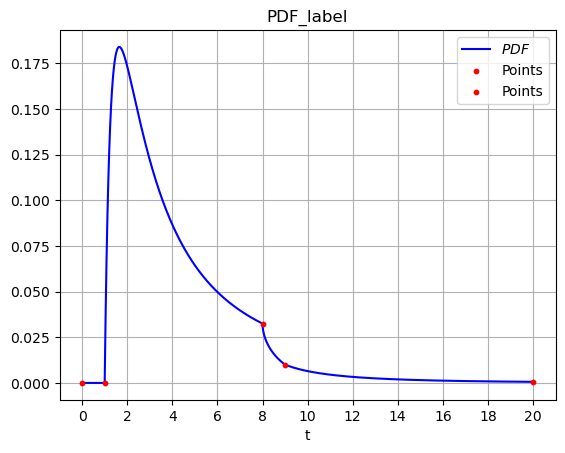

['x0 = 59/5', 'y0 = 1', 'top = 1 - 59*x/5', 'bottom1 = 1 - 69*x/5', 'bottom2 = 1/3 - 182*x/15', 'point1 = 2/5', 'left = 0']
[1, 8, 12, 25/2]
f$010$000$000
f$010$010$000
f$011$110$000


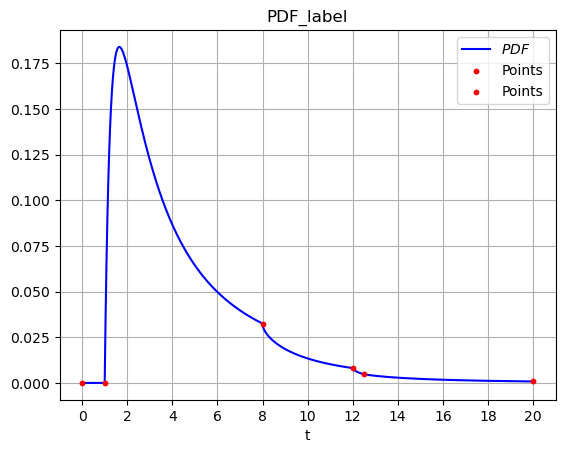

['x0 = 34/5', 'y0 = 1', 'top = 1 - 34*x/5', 'bottom1 = 1 - 39*x/5', 'left = 0']
[1, 4]
f$010$000$000


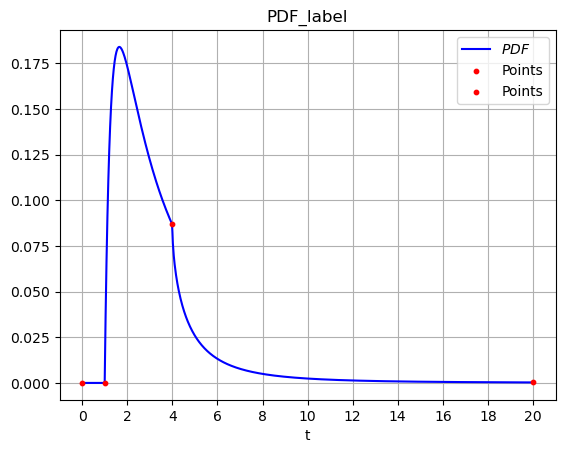

['x0 = 14/5', 'y0 = 1', 'top = 1 - 14*x/5', 'bottom1 = 1 - 19*x/5', 'left = 0']
[1, 4]
f$010$000$000


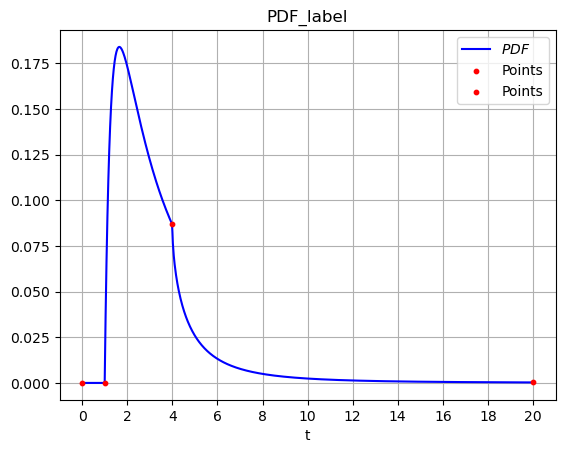

['x0 = 9/5', 'y0 = 1', 'top = 1 - 9*x/5', 'bottom1 = 1 - 14*x/5', 'left = 0']
[1, 4]
f$010$000$000


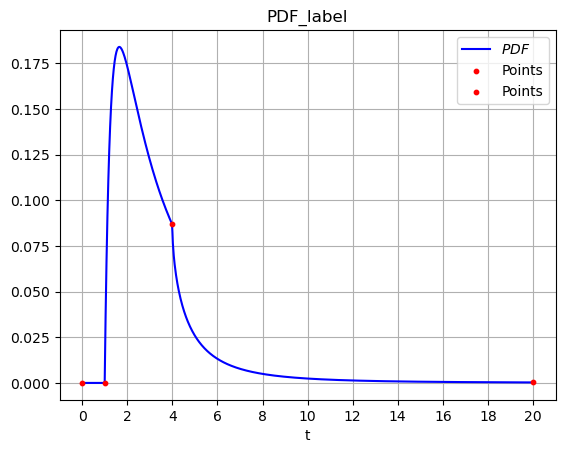

['x0 = 43/5', 'y0 = 2', 'top = 1/2 - 43*x/10', 'bottom1 = 1 - 29*x/5', 'bottom2 = 1/3 - 67*x/15', 'point1 = 1/2', 'left = 1/3']
[2, 6, 8]
f$110$011$000
f$111$111$000


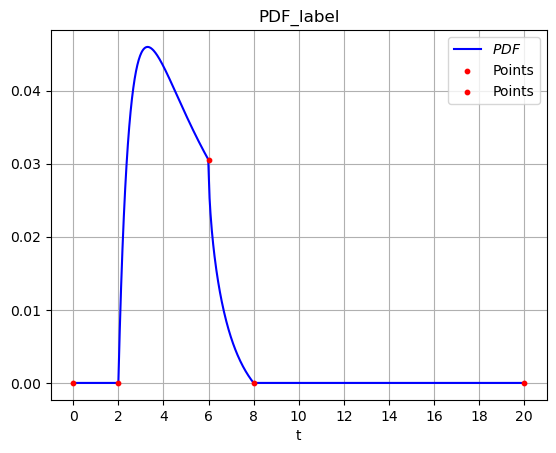

['x0 = 182/5', 'y0 = 3', 'top = 1/3 - 182*x/15', 'bottom1 = 1 - 69*x/5', 'bottom2 = 1/5 - 61*x/5', 'point1 = 1/2', 'left = 2/5']
[3, 15/2, 12]
f$110$011$000
f$111$111$000


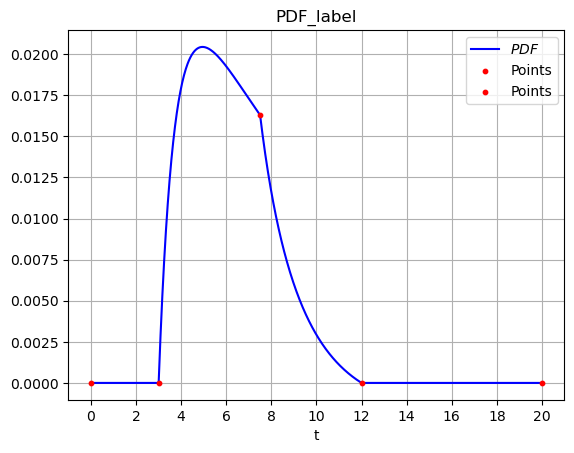

['x0 = 48/5', 'y0 = 2', 'top = 1/2 - 24*x/5', 'bottom1 = 1 - 29*x/5', 'left = 1/2']
[2, 4]
f$110$000$000


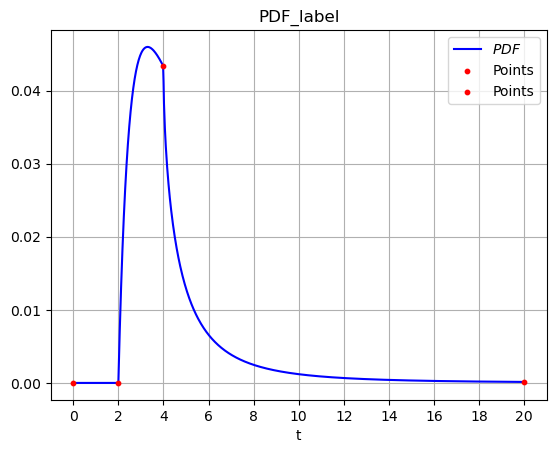

['x0 = 67/5', 'y0 = 3', 'top = 1/3 - 67*x/15', 'bottom1 = 1/2 - 24*x/5', 'left = 1/2']
[3, 16/3, 6]
f$010$000$000
f$111$000$000


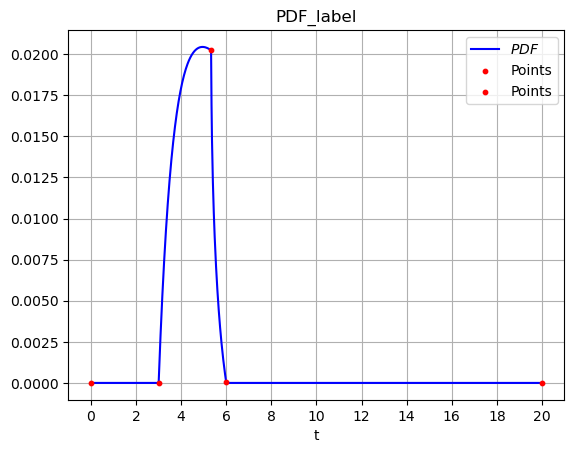

['x0 = 61', 'y0 = 5', 'top = 1/5 - 61*x/5', 'bottom1 = 1/4 - 123*x/10', 'left = 1/2']
[5, 20/3, 10]
f$011$000$000
f$111$000$000


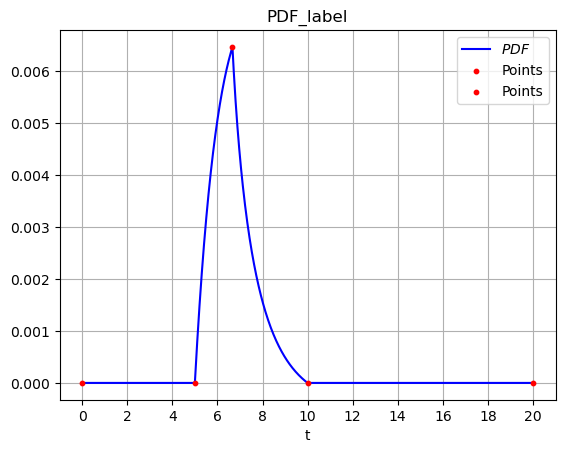

['x0 = 187/5', 'y0 = 3', 'top = 1/3 - 187*x/15', 'bottom1 = 1/2 - 64*x/5', 'left = 1/2']
[3, 16/3, 6]
f$010$000$000
f$111$000$000


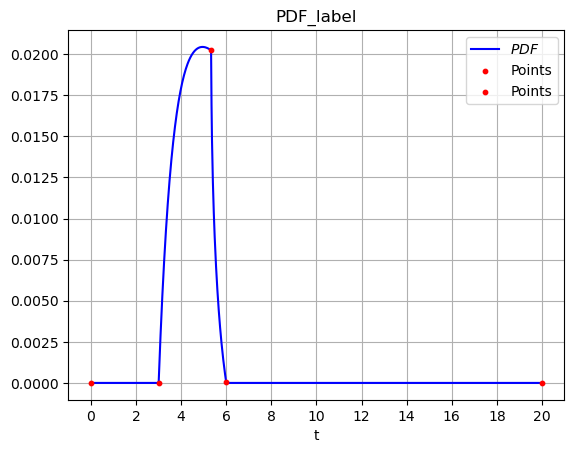

['x0 = 128/5', 'y0 = 2', 'top = 1/2 - 64*x/5', 'bottom1 = 1 - 69*x/5', 'left = 1/2']
[2, 4]
f$110$000$000


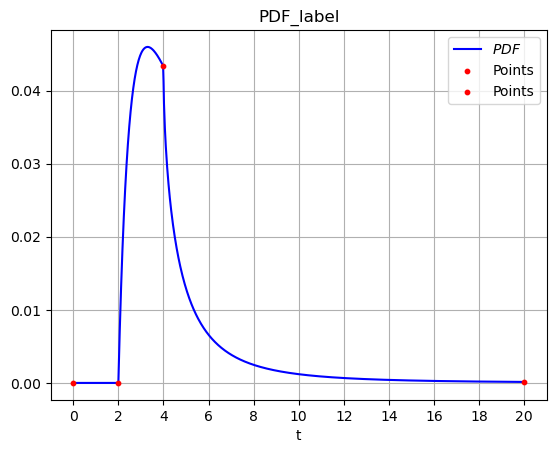

['x0 = 246/5', 'y0 = 4', 'top = 1/4 - 123*x/10', 'bottom1 = 1/3 - 187*x/15', 'left = 1/2']
[4, 6, 8]
f$011$000$000
f$111$000$000


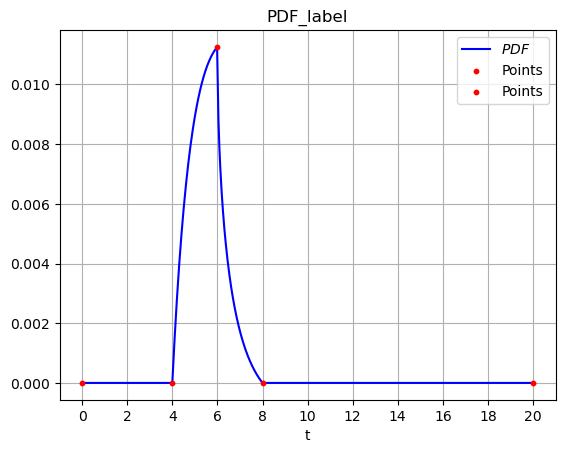

LaTeX file saved: 7
PDF successfully created: 7
section 8
['x0 = 2', 'y0 = 1', 'top = 1 - 2*x', 'bottom1 = 1 - 5*x', 'bottom2 = 1/2 - 5*x/2', 'point1 = 1/5', 'left = 0']
[1, 8, 12, 25/2]
f$000$010$000
f$010$010$000
f$011$110$000


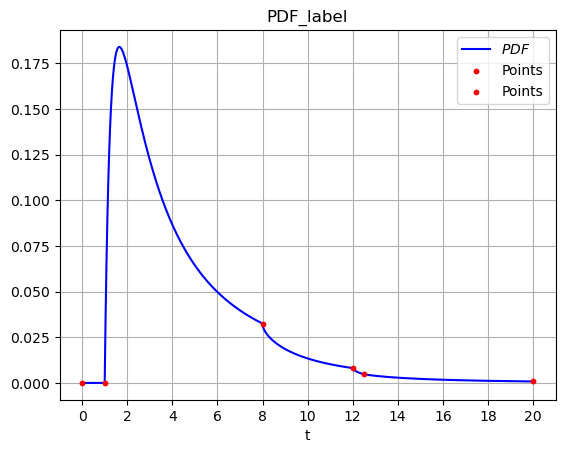

['x0 = 5', 'y0 = 1', 'top = 1 - 5*x', 'bottom1 = 1 - 6*x', 'left = 0']
[1, 4]
f$010$000$000


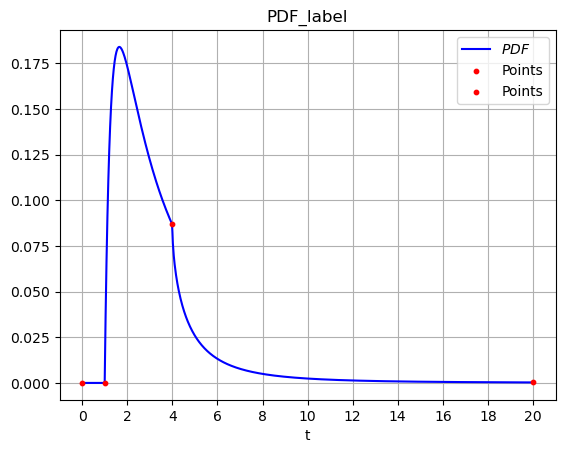

['x0 = 6', 'y0 = 1', 'top = 1 - 6*x', 'bottom1 = 1 - 7*x', 'left = 0']
[1, 4]
f$010$000$000


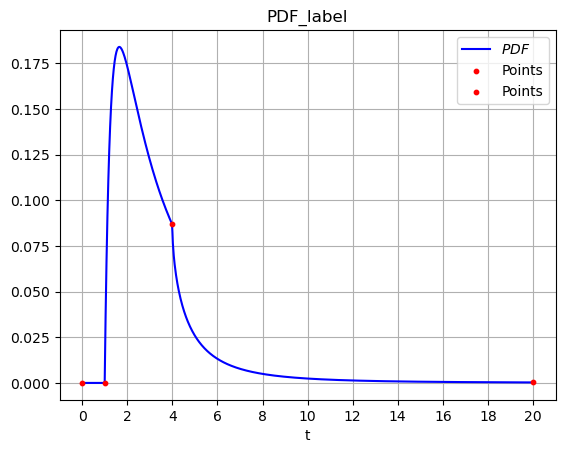

['x0 = 7', 'y0 = 1', 'top = 1 - 7*x', 'bottom1 = 1 - 8*x', 'left = 0']
[1, 4]
f$010$000$000


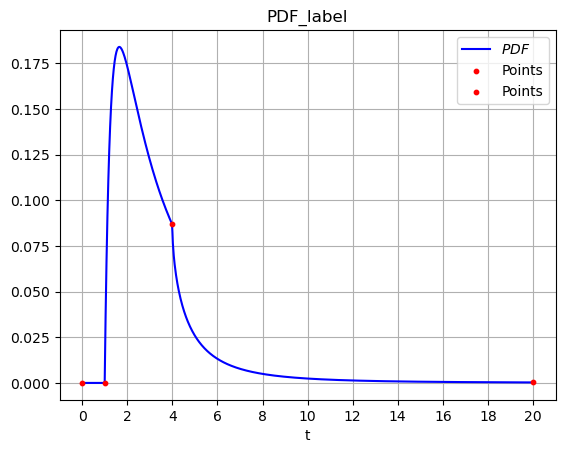

['x0 = 1', 'y0 = 1', 'top = 1 - x', 'bottom1 = 1 - 2*x', 'left = 0']
[1, 4]
f$010$000$000


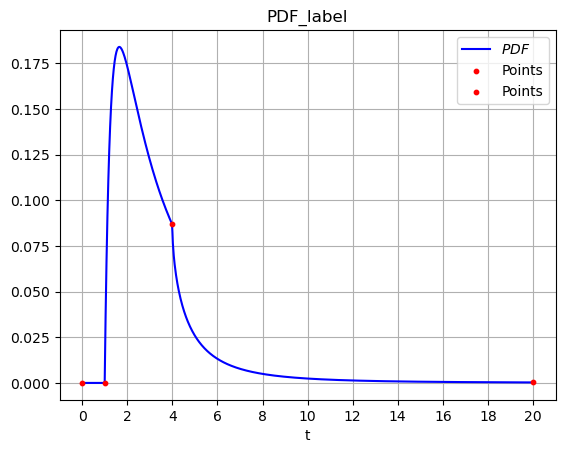

['x0 = 5', 'y0 = 2', 'top = 1/2 - 5*x/2', 'bottom1 = 1 - 5*x', 'bottom2 = 1/2 - 3*x', 'bottom3 = 1/3 - 8*x/3', 'point1 = 1/4', 'point2 = 1/2', 'left = 1/5']
[2, 6, 8, 10, 32/3]
f$000$000$011
f$000$011$111
f$110$011$111
f$111$111$111


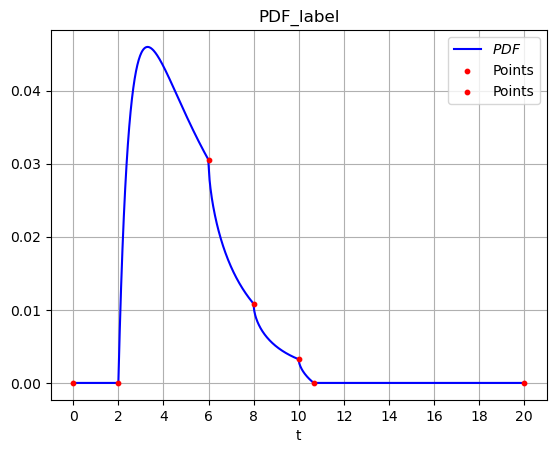

['x0 = 6', 'y0 = 2', 'top = 1/2 - 3*x', 'bottom1 = 1 - 5*x', 'bottom2 = 1/2 - 7*x/2', 'point1 = 1/3', 'left = 1/4']
[2, 8, 9]
f$110$010$000
f$111$110$000


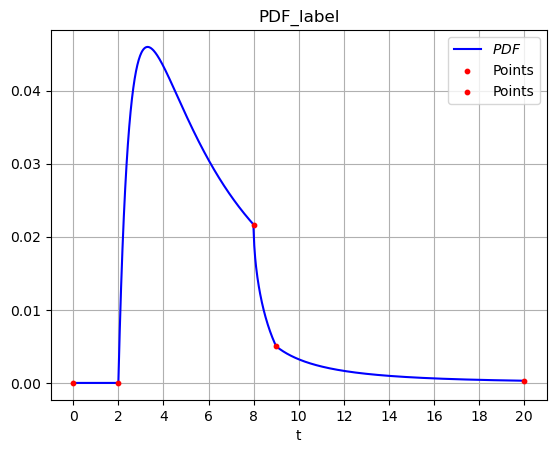

['x0 = 7', 'y0 = 2', 'top = 1/2 - 7*x/2', 'bottom1 = 1 - 5*x', 'bottom2 = 1/2 - 4*x', 'point1 = 1/2', 'left = 1/3']
[2, 6, 8]
f$110$000$000
f$111$110$000


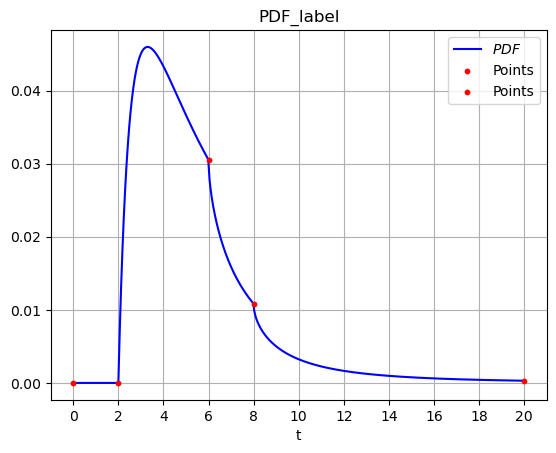

['x0 = 8', 'y0 = 2', 'top = 1/2 - 4*x', 'bottom1 = 1 - 5*x', 'left = 1/2']
[2, 4]
f$110$000$000


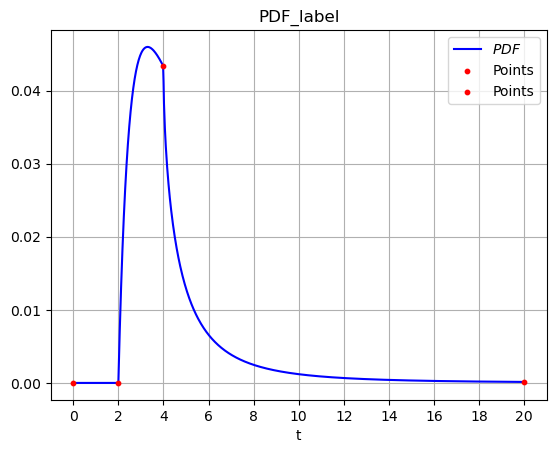

['x0 = 8', 'y0 = 3', 'top = 1/3 - 8*x/3', 'bottom1 = 1/2 - 3*x', 'left = 1/2']
[3, 16/3, 6]
f$010$000$000
f$111$000$000


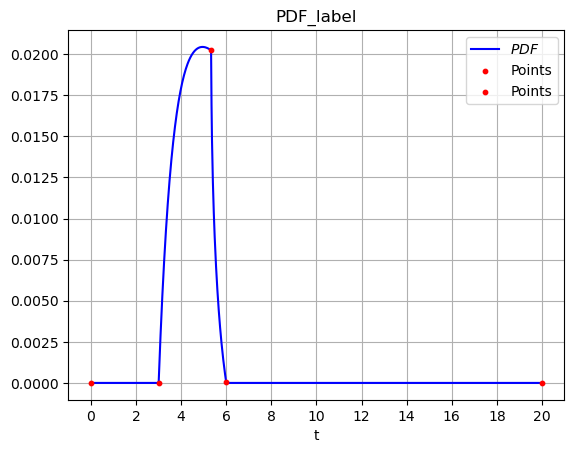

LaTeX file saved: 8
PDF successfully created: 8
section 9
['x0 = 40/9', 'y0 = 1', 'top = 1 - 40*x/9', 'bottom1 = 1 - 49*x/9', 'left = 0']
[1, 4]
f$010$000$000


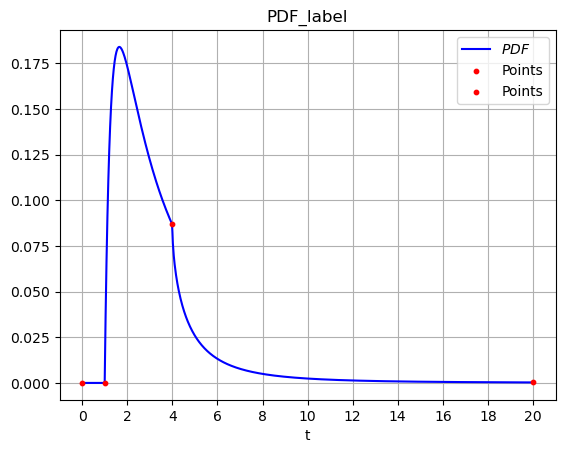

['x0 = 49/9', 'y0 = 1', 'top = 1 - 49*x/9', 'bottom1 = 1 - 58*x/9', 'left = 0']
[1, 4]
f$010$000$000


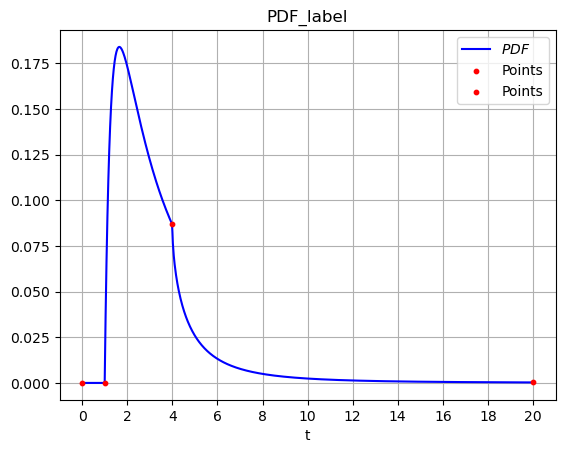

['x0 = 22/9', 'y0 = 1', 'top = 1 - 22*x/9', 'bottom1 = 1 - 40*x/9', 'bottom2 = 1/2 - 53*x/18', 'point1 = 1/3', 'left = 0']
[1, 8, 9]
f$010$010$000
f$011$110$000


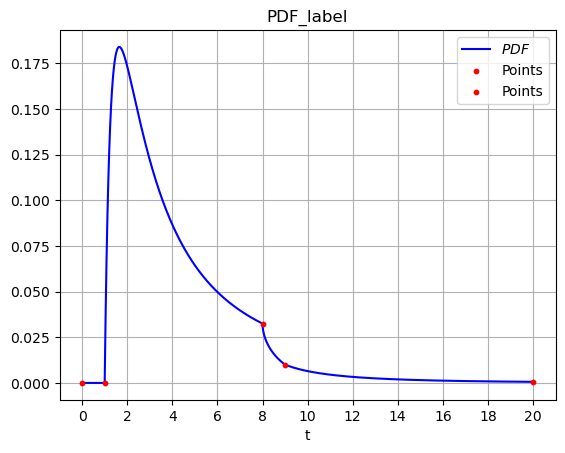

['x0 = 58/9', 'y0 = 1', 'top = 1 - 58*x/9', 'bottom1 = 1 - 76*x/9', 'bottom2 = 1/2 - 125*x/18', 'point1 = 1/3', 'left = 0']
[1, 8, 9]
f$010$010$000
f$011$110$000


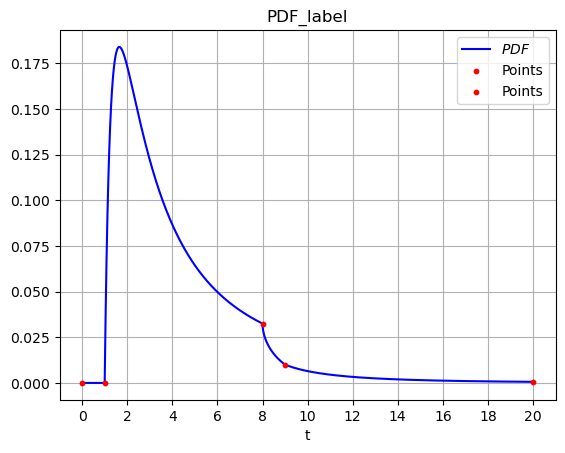

['x0 = 13/9', 'y0 = 1', 'top = 1 - 13*x/9', 'bottom1 = 1 - 22*x/9', 'left = 0']
[1, 4]
f$010$000$000


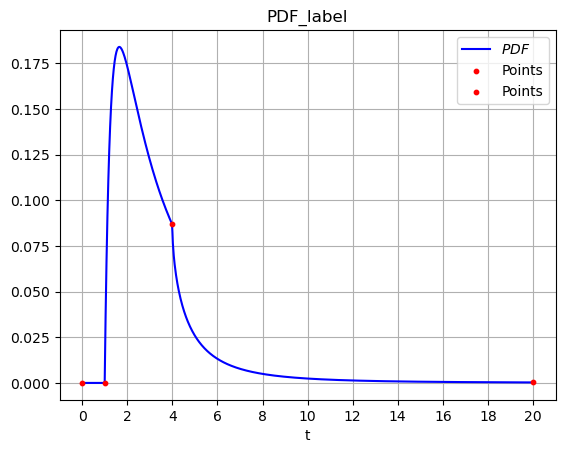

['x0 = 53/9', 'y0 = 2', 'top = 1/2 - 53*x/18', 'bottom1 = 1 - 40*x/9', 'bottom2 = 1/3 - 28*x/9', 'point1 = 1/2', 'left = 1/3']
[2, 6, 8]
f$110$011$000
f$111$111$000


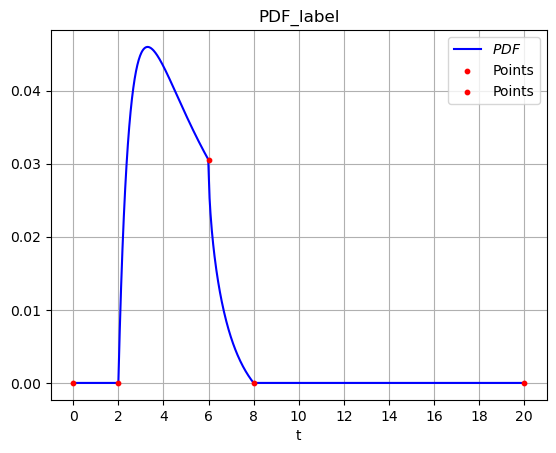

['x0 = 125/9', 'y0 = 2', 'top = 1/2 - 125*x/18', 'bottom1 = 1 - 76*x/9', 'bottom2 = 1/2 - 67*x/9', 'bottom3 = 1/5 - 317*x/45', 'point1 = 1/2', 'point2 = 3/4', 'left = 1/3']
[2, 6, 8, 10, 32/3]
f$110$000$000
f$111$110$000
f$111$110$011
f$111$111$111


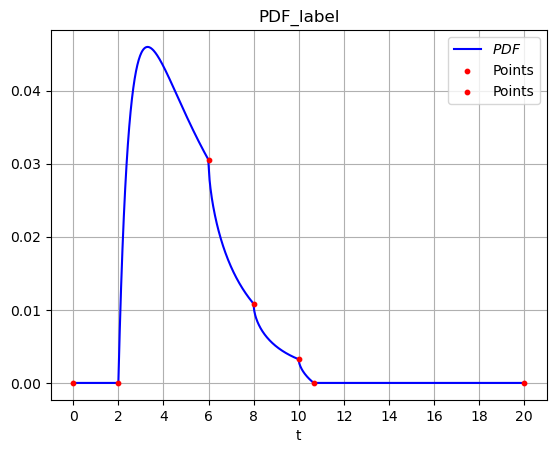

['x0 = 62/9', 'y0 = 2', 'top = 1/2 - 31*x/9', 'bottom1 = 1 - 40*x/9', 'left = 1/2']
[2, 4]
f$110$000$000


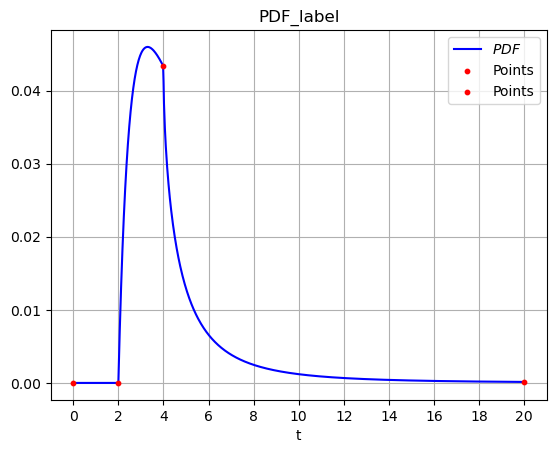

['x0 = 28/3', 'y0 = 3', 'top = 1/3 - 28*x/9', 'bottom1 = 1/2 - 31*x/9', 'left = 1/2']
[3, 16/3, 6]
f$010$000$000
f$111$000$000


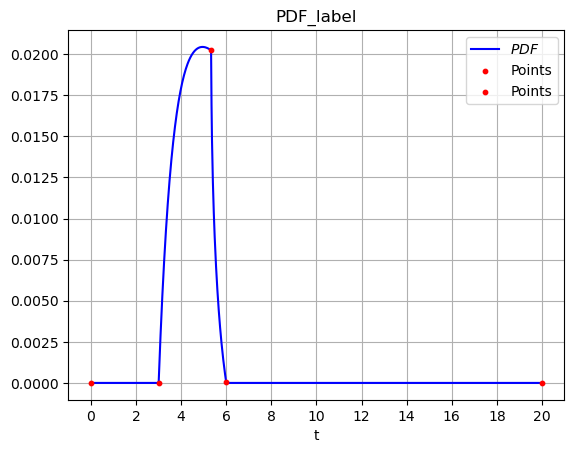

['x0 = 134/9', 'y0 = 2', 'top = 1/2 - 67*x/9', 'bottom1 = 1 - 76*x/9', 'left = 1/2']
[2, 4]
f$110$000$000


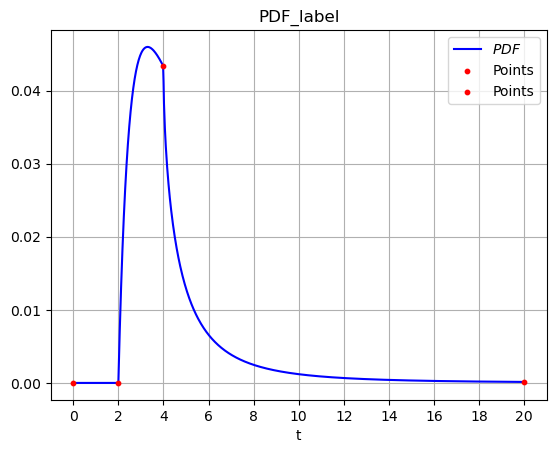

['x0 = 317/9', 'y0 = 5', 'top = 1/5 - 317*x/45', 'bottom1 = 1/2 - 67*x/9', 'left = 3/4']
[5, 20/3, 10]
f$110$000$000
f$111$000$000


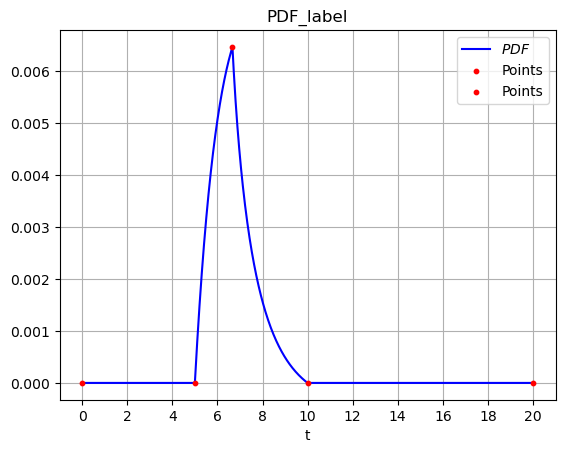

LaTeX file saved: 9
PDF successfully created: 9


<Figure size 640x480 with 0 Axes>

In [3]:
list_integrals, boundary_points = run_integrals(n_squares, index, a)

In [4]:
boundary_points

[0, 1, 2, 3, 4, 5, 16/3, 6, 20/3, 15/2, 8, 9, 10, 32/3, 12, 25/2, 20, 20]

Combined Piecewise Function:


<IPython.core.display.Math object>

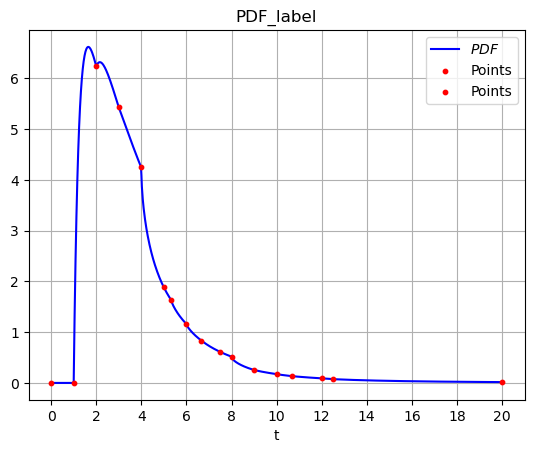

<Figure size 640x480 with 0 Axes>

In [6]:
from sympy import symbols, And, Piecewise, Add, N, simplify
from sympy.core.relational import Relational

# Define the symbol
t = symbols('t')

# Function to create intervals and combine equations
def create_combined_piecewise(piecewise_list, boundary_points):
    combined_piecewise = []

    for i in range(len(boundary_points) - 1):
        lower_bound = boundary_points[i]
        upper_bound = boundary_points[i + 1]

        # Create the condition for the current interval
        interval_condition = (t >= lower_bound) & (t < upper_bound)

        # Find all equations active in this interval
        active_equations = []
        for pw in piecewise_list:
            for expr, cond in pw.args:
                if isinstance(cond, And):
                    # Check if the interval is fully contained within the condition
                    if simplify(And(interval_condition, cond)) == interval_condition:
                        active_equations.append(expr)
                elif isinstance(cond, Relational):
                    print("yup")
                    # Check if the interval is fully contained within the condition
                    if simplify(And(interval_condition, cond)) == interval_condition:
                        active_equations.append(expr)

        # Add the active equations together
        if active_equations:
            combined_expression = Add(*active_equations)
            combined_piecewise.append((combined_expression, interval_condition))

    # Create the final combined Piecewise function
    return Piecewise(*combined_piecewise)

# Create the combined Piecewise function
combined_pw = create_combined_piecewise(list_integrals, boundary_points)

# Print the result
print("Combined Piecewise Function:")
latex_expr = sp.latex(combined_pw)
latex_expr = latex_expr.replace(r"\text{for}\: t", "").replace(r"\geq", "").replace(r"\wedge", r"\leq")

interval_list = [[boundary_points[i], boundary_points[i + 1]] for i in range(len(boundary_points) - 1)]

# Display the resul
display(Math(latex_expr))

graph_piece(combined_pw, interval_list, n_squares, index, -1, 50)

In [13]:
latex_expr = sp.latex(combined_pw).replace(r'\\', r'\\' + '\n')
latex_expr = latex_expr.replace(r"\text{for}\: t", "").replace(r"\geq", "").replace(r"\wedge", r"\leq")
display(Math(latex_expr))

<IPython.core.display.Math object>

In [23]:
final_dir = os.path.join("results", f"{n_squares} - {index}")
os.makedirs(final_dir, exist_ok=True)  # Ensure directory exists

latex_file_path = os.path.join(final_dir, f"final_eq.tex")
pdf_file_path = os.path.join(final_dir, f"final_eq.pdf")

    # Write LaTeX file
with open(latex_file_path, "w") as latex_file:
    latex_file.write("\\documentclass{article}\n")
    latex_file.write("\\usepackage{amsmath}\n")
    latex_file.write("\\begin{document}\n\n")
    latex_file.write(f"Equation:\n\\[\n{latex_expr}\n\\]\n\n")
    latex_file.write("\\end{document}\n")

# Compile LaTeX file
try:
    with open(os.devnull, "w") as FNULL:
        subprocess.run(
            ["pdflatex", "-output-directory", final_dir, latex_file_path],
            stdout=FNULL, stderr=FNULL, check=True
        )

    print(f"PDF successfully created: {pdf_file_path}")

    # Remove auxiliary files (.log, .aux)
    for ext in [".log", ".aux"]:
        aux_file = os.path.join(final_dir, f"final_eq{ext}")
        if os.path.exists(aux_file):
            os.remove(aux_file)

except subprocess.CalledProcessError:
    print(f"Error: Failed to compile {latex_file_path} into a PDF.")

PDF successfully created: results/7 - 0/final_eq.pdf


In [7]:
# Open the file in write mode
totalVol = M('totalVol = FullSimplify[totalVol]')
totalVol2 = M('totalVolN = N[totalVol]')
save_path = os.path.join("results", f"{n_squares} - {index}", "coVolume.txt")
with open(save_path, "w") as file:
    file.write(f"{totalVol}\n\n\n")
    file.write(f"rounded coVol: {totalVol2}\n")
    file.write(f"rounded target: {target}\n")

In [4]:
M('ClearAll["Global`*"]')
totalVol = M('totalVol = 0')
j = 8
df = read_df(n_squares, index, j)
print(f"section {j}")

vecs, x_vals, m0, m1, x0, y0, dx_y, z = setup(a[0][j], c[0][j], e[0][j], vecs0, dx, True)
sec_list2, vec_order, vec_dict = sec_setup2(df, dx_y)
secs2 = sec_comp2(df, sec_list2, vec_order, vec_dict, dx, dx_y, m1, y0)


KeyboardInterrupt



In [ ]:
f_list = []
allFunctions = M('allFunctions= {}')
sections = get_secs(secs2)
for section in sections:
    print(section)
    if len(section) == 5:
        x0, y0, top, bottom1, left = section
        bottoms = [bottom1]
        points = []
    if len(section) == 7:
        x0, y0, top, bottom1, bottom2, point1, left = section
        bottoms = [bottom1, bottom2]
        points = [point1]
    if len(section) == 9:
        x0, y0, top, bottom1, bottom2, bottom3, point1, point2, left = section
        bottoms = [bottom1, bottom2, bottom3]
        points = [point1, point2]
        
    eqs, totalVol = integrals(x0, y0, top, bottoms, points, left)
    print()
    # Example expression string
    expression_string = repr(eqs[1])
    
    # Generate and execute the function
    es, cs = parse_piecewise_sp(expression_string)
    
    eq_tuples = []
    for eq, cond in zip (es, cs):
        eq_tuples.append((parse_expr(eq, local_dict={'t': t, 'sp': sp}), sp.And(sp.simplify(cond[0]) <= t, t < sp.simplify(cond[1]))))
    
    f = sp.Piecewise(*eq_tuples)
    allFunctions = M('allFunctions = Append[allFunctions, combined];')
    latex_expr = sp.latex(f)
    latex_expr = latex_expr.replace(r"\text{for}\: t", "").replace(r"\geq", "").replace(r"\wedge", r"\leq")
    
    # Display the result
    #display(Math(latex_expr))
    graph_piece(f, cs)

In [9]:
total = f_list[0]
for i in range(1, len(f_list)):
    total += f_list[i]

In [12]:
f_list

[Piecewise((0, (t < 1.0) & (t >= 0)), (-log(1/t)/t**2, (t >= 1.0) & (t < 8.0)), (-(log(1/t) + 2*atanh(sqrt((t - 8)/t)))/t**2, (t >= 8.0) & (t < 12.0)), (-(log(1/t) + 2*atanh(sqrt((t - 12)/t)) + 2*atanh(sqrt((t - 8)/t)))/t**2, (t >= 12.0) & (t < 12.5)), ((-2*t**2*log(1/t) - 2*t**2*log(5*sqrt((t - 8)/t)/2 + 5/2) + sqrt(t - 12)*(sqrt(t)*(sqrt(t)*sqrt(t - 12)*(sqrt((t - 12)/t) - 1) + t*(sqrt((t - 12)/t) - 1) + 12) - 2*sqrt(t - 12)*(t*(sqrt((t - 12)/t) - 1) + 12)*log(5/6 - 5*sqrt((t - 12)/t)/6))/(((t - 12)/t)**(3/2)*(sqrt((t - 12)/t) - 1)))/(2*t**4), (t >= 12.5) & (t < 20))),
 Piecewise((0, (t >= 0) & (t < 1)), (-log(1/t)/t**2, (t >= 1) & (t < 4)), (-(log(1/t) + 2*atanh(sqrt((t - 4)/t)))/t**2, (t >= 4) & (t < 20))),
 Piecewise((0, (t >= 0) & (t < 1)), (-log(1/t)/t**2, (t >= 1) & (t < 4)), (-(log(1/t) + 2*atanh(sqrt((t - 4)/t)))/t**2, (t >= 4) & (t < 20))),
 Piecewise((0, (t >= 0) & (t < 1)), (-log(1/t)/t**2, (t >= 1) & (t < 4)), (-(log(1/t) + 2*atanh(sqrt((t - 4)/t)))/t**2, (t >= 4) & (t < 

In [ ]:
sp.piecewise_fold(total)

In [6]:
totalVol2 = M('totalVolN = N[totalVol]')
totalVol = M('totalVol = FullSimplify[totalVol]')

totalVol2, totalVol

(14.072900205402641,
 Pi^2/4 + (11*Log[2]^2)/2 + Log[9/4]*Log[3] + Log[5]^2 - Log[4]*Log[45/4] + 
  PolyLog[2, 3/5] + PolyLog[2, 5/8] + 4*PolyLog[2, 2/3] + 3*PolyLog[2, 3/4] + 
  PolyLog[2, 4/5])

In [5]:
def integrals(x0, y0, top, bottoms, points, left):
    #M('ClearAll["Global`*"]')

    x0 = M(f"{x0}")
    y0 = M(f"{y0}")
    
    top = M(f"{top}")
    
    bottom1 = M(f"{bottoms[0]}")
    try:
        bottom2 = M(f"{bottoms[1]}")
    except:
        bottom2 = None
    try:
        bottom3 = M(f"{bottoms[2]}")
    except:
        bottom3 = None
        
    try:
        point1 = M(f"{points[0]}")
    except:
        point1 = None
    try:
        point2 = M(f"{points[1]}")
    except:
        point2 = None
        
    left = M(f"{left}")
    
    func = M('func = 1/(t*x) - x0/y0*x')
    funct = M('funct = y0/(x*(x0*x + y0*y))')
    
    if bottom2 is None:
        point1 = M('point1 = 1')
    elif bottom3 is None:
        point2 = M('point2 = 1')
    
    symbolicZeros = M('symbolicZeros = Solve[bottom1 - func == 0, x]')
    l1 = M('l1 = x /. symbolicZeros[[1]]')
    l2 = M('l2 = x /. symbolicZeros[[2]]')
    
    if bottom2 is not None:
        symbolicZeros = M('symbolicZeros = Solve[bottom2 - func == 0, x]')
        m1 = M('m1 = x /. symbolicZeros[[1]]')
        m2 = M('m2 = x /. symbolicZeros[[2]]')
    
    if bottom3 is not None:
        symbolicZeros = M('symbolicZeros = Solve[bottom3 - func == 0, x]')
        r1 = M('r1 = x /. symbolicZeros[[1]]')
        r2 = M('r2 = x /. symbolicZeros[[2]]')
    
    if bottom1 is not None and bottom2 is not None and bottom3 is not None:
        expressions = {
            "timeEnter": 'timeEnter = t /. Solve[y0 - t == 0, t][[1]]',
            "timeLeftEnd": 'timeLeftEnd = t /. Solve[l1 - left == 0, t][[1]]',
            "timeBottom1": 'timeBottom1 = t /. Solve[l2 - l1 == 0, t][[1]]',
            "timePoint1": 'timePoint1 = t /. Solve[l2 == m1, t][[1]]',
            "timeBottom2": 'timeBottom2 = t /. Solve[m2 - m1 == 0, t][[1]]',
            "timePoint2": 'timePoint2 = t /. Solve[m2 == r1, t][[1]]',
            "timeBottom3": 'timeBottom3 = t /. Solve[r2 - r1 == 0, t][[1]]',
            "timeRightEnd": 'timeRightEnd = t /. Solve[r2 - 1 == 0, t][[1]]',
            "timeLeftEndA": 'timeLeftEndA = t /. Solve[l2 - left == 0, t][[1]]',
            "timeRightEndA": 'timeRightEndA = t /. Solve[r1 - 1 == 0, t][[1]]'
        }
    
        results = {}
        for key, expr in expressions.items():
            try:
                results[key] = float(M(expr))
            except Exception:
                results[key] = None
            #print(f'{key}: {results[key]}')
        
        # Unpacking the results if you still want individual variables
        (timeEnter, timeLeftEnd, timeBottom1, timePoint1,
         timeBottom2, timePoint2, timeBottom3, timeRightEnd, timeLeftEndA, timeRightEndA) = results.values()

        print(timeEnter, timeLeftEnd, timeBottom1, timePoint1, timeBottom2, timePoint2, timeBottom3, timeRightEnd, timeLeftEndA, timeRightEndA)
        
        if timeRightEnd is None and timeRightEndA is None:
            timeRightEnd = M('timeRightEnd = 20')
        if timeLeftEnd is None and timeLeftEndA is None:
            timeLeftEnd = M('timeLeftEnd = 20')
        
        if timeRightEnd is None and timeRightEndA is not None:
            timeRightEnd = M('timeRightEnd = timeRightEndA')
            timeBottom3 = M('timeBottom3 = timeRightEnd')
            results['timeRightEnd'] = timeRightEndA
            results['timeBottom3'] = timeRightEndA
        if timeLeftEnd is None and timeLeftEndA is not None:
            timeLeftEnd = M('timeLeftEnd = timeLeftEndA')
            timeBottom1 = M('timeBottom1 = timeLeftEnd')
            results['timeLeftEnd'] = timeLeftEndA
            results['timeBottom1'] = timeLeftEndA

        print(timeEnter, timeLeftEnd, timeBottom1, timePoint1, timeBottom2, timePoint2, timeBottom3, timeRightEnd, timeLeftEndA, timeRightEndA)
                
    elif bottom1 is not None and bottom2 is not None and bottom3 is None:
        expressions = {
            "timeEnter": 'timeEnter = t /. Solve[y0 - t == 0, t][[1]]',
            "timeLeftEnd": 'timeLeftEnd = t /. Solve[l1 - left == 0, t][[1]]',
            "timeBottom1": 'timeBottom1 = t /. Solve[l2 - l1 == 0, t][[1]]',
            "timePoint1": 'timePoint1 = t /. Solve[l2 == m1, t][[1]]',
            "timeBottom2": 'timeBottom2 = t /. Solve[m2 - m1 == 0, t][[1]]',
            "timePoint2": 'timePoint2 = t /. Solve[m2 - 1 == 0, t][[1]]',
            "timeLeftEndA": 'timeLeftEndA = t /. Solve[l2 - left == 0, t][[1]]',
            "timePoint2A": 'timePoint2A = t /. Solve[m1 - 1 == 0, t][[1]]'
        }
    
        results = {}
        for key, expr in expressions.items():
            try:
                results[key] = float(M(expr))
            except Exception:
                results[key] = None
            #print(f'{key}: {results[key]}')
        
        # Unpacking the results if you still want individual variables
        (timeEnter, timeLeftEnd, timeBottom1, timePoint1,
         timeBottom2, timePoint2, timeLeftEndA, timePoint2A) = results.values()

        print(timeEnter, timeLeftEnd, timeBottom1, timePoint1, timeBottom2, timePoint2, timeLeftEndA, timePoint2A)
        
        if timePoint2 is None and timePoint2A is None:
            timePoint2 = M('timePoint2 = 20')
        if timeLeftEnd is None and timeLeftEndA is None:
            timeLeftEnd = M('timeLeftEnd = 20')
        if timePoint2 is None and timePoint2A is not None:
            timePoint2 = M('timePoint2 = timePoint2A')
            timeBottom2 = M('timeBottom2 = timePoint2A')
            results['timePoint2'] = timePoint2A
            results['timeBottom2'] = timePoint2A
        if timeLeftEnd is None and timeLeftEndA is not None:
            timeLeftEnd = M('timeLeftEnd = timeLeftEndA')
            timeBottom1 = M('timeBottom1 = timeLeftEnd')
            results['timeLeftEnd'] = timeLeftEndA
            results['timeBottom1'] = timeLeftEndA

        print(timeEnter, timeLeftEnd, timeBottom1, timePoint1, timeBottom2, timePoint2, timeLeftEndA, timePoint2A)
    
    elif bottom1 is not None and bottom2 is None and bottom3 is None:
        expressions = {
            "timeEnter": 'timeEnter = t /. Solve[y0 - t == 0, t][[1]]',
            "timeLeftEnd": 'timeLeftEnd = t /. Solve[l1 - left == 0, t][[1]]',
            "timeBottom1": 'timeBottom1 = t /. Solve[l2 - l1 == 0, t][[1]]',
            "timePoint1": 'timeRightEnd = t /. Solve[l2 - 1 == 0, t][[1]]',
            "timeLeftEndA": 'timeLeftEndA = t /. Solve[l2 - left == 0, t][[1]]',
            "timePoint1A": 'timePoint1A = t /. Solve[l1 - 1 == 0, t][[1]]'
        }
    
        results = {}
        for key, expr in expressions.items():
            try:
                results[key] = float(M(expr))
            except Exception:
                results[key] = None
            #print(f'{key}: {results[key]}')
        
        # Unpacking the results if you still want individual variables
        (timeEnter, timeLeftEnd, timeBottom1, timePoint1, timeLeftEndA, timePoint1A) = results.values()

        print(timeEnter, timeLeftEnd, timeBottom1, timePoint1, timeLeftEndA, timePoint1A)
        
        if timePoint1 is None and timePoint1A is None:
            timePoint1 = M('timePoint1 = 20')
        if timeLeftEnd is None and timeLeftEndA is None:
            timeLeftEnd = M('timeLeftEnd = 20')

        if timePoint1 is None and timePoint1A is not None:
            timePoint1 = M('timePoint1 = timePoint1A')
            timeBottom1 = M('timeBottom1 = timePoint1')
            results['timePoint1'] = timePoint1A
            results['timeBottom1'] = timePoint1A
        if timeLeftEnd is None and timeLeftEndA is not None:
            timeLeftEnd = M('timeLeftEnd = timeLeftEndA')
            timeBottom1 = M('timeBottom1 = timeLeftEnd')
            results['timeLeftEnd'] = timeLeftEndA
            results['timeBottom1'] = timeLeftEndA

        print(timeEnter, timeLeftEnd, timeBottom1, timePoint1, timeLeftEndA, timePoint1A)
    else:
        raise ValueError("section defined improperly")
    
    try:
        f1 = M('f1 = Simplify[D[Integrate[1, {x, y0/t, 1}, {y, func, top}], t]]')
    except:
        f1 = -1
    try:
        fL = M('fL = Simplify[D[Integrate[1, {x, left, 1}, {y, func, top}], t]]')
    except:
        fL = -1
        #print("no fL")
    
    nums = set()
    for key in results.keys():
        num = results[key]
        if num is None:
            continue
        nums.add(num)
    nums = sorted(list(nums))
    
    #print()
    
    function_strings = []
    function_strings.append(0)
    for num in nums:
        function_string = list('000$000$000')  # Convert string to list for mutability
        
        if timeLeftEnd <= num:
            function_string[0] = '1'
        if timeBottom1 <= num:
            function_string[1] = '1'
        if timePoint1 <= num:
            function_string[2:5] = list('1$1')  # Assign list to preserve underscore
        if bottom2 is not None:
            if timeBottom2 <= num:
                function_string[5] = '1'
            if timePoint2 <= num:
                function_string[6:9] = list('1$1')  # Assign list
        if bottom3 is not None:
            if timeBottom3 <= num:
                function_string[9] = '1'
            if timeRightEnd <= num:
                function_string[10] = '1'
    
        if bottom2 is None:
            function_string[4:] = '000$000'
        elif bottom3 is None:
            #print("true")
            function_string[8:] = '000'
        function_string = ''.join(function_string)  # Convert list back to string
        print(function_string)  # Or store it somewhere
        function_strings.append("f$" + function_string)
    function_strings[1] = "f1"
    
    equations = []
    for function in function_strings[2:]:
        print(function)
        eq = M(f"{equations_dict[function]}")
        equations.append(eq)
    
    nums.append(0)
    nums = sorted(nums)
    combined_string = 'combined = Piecewise[{'
    for i in range(len(function_strings)):
        t0 = nums[i]
        try:
            t1 = nums[i+1]
        except:
            t1 = 20
        combined_string = combined_string + f"/{{{function_strings[i]}, {t0} <= t < {t1}}}"
        if i+1 < len(function_strings):
            combined_string = combined_string + ","
    combined_string = combined_string + "}]"
    combined_string = combined_string.replace("/", "")
    combined_string = re.sub(r"\s*--\s*", "/", combined_string)
    #print(combined_string)
    
    combined = M(f"{combined_string}")
    eqs = M('Normal @ combined')

    if bottom3 is not None:
        b1Co = M('b1Co = Integrate[funct, {x, left, point1}, {y, bottom1, top}]')
        b2Co = M('b2Co = Integrate[funct, {x, point1, point2}, {y, bottom2, top}]')
        b3Co = M('b3Co = Integrate[funct, {x, point2, 1}, {y, bottom3, top}]')
        totalVol = M('totalVol = totalVol + b1Co + b2Co + b3Co')
    elif bottom2 is not None:
        b1Co = M('b1Co = Integrate[funct, {x, left, point1}, {y, bottom1, top}]')
        b2Co = M('b2Co = Integrate[funct, {x, point1, point2}, {y, bottom2, top}]')
        totalVol = M('totalVol = totalVol + b1Co + b2Co')
    elif bottom1 is not None:
        b1Co = M('b1Co = Integrate[funct, {x, left, point1}, {y, bottom1, top}]')
        totalVol = M('totalVol = totalVol + b1Co')

    allFunctions = M('allFunctions = Append[allFunctions, eqs]')
    #print(totalVol)
        
    return eqs, totalVol

In [11]:
# Convert Mathematica syntax to Python syntax
expression_string = repr(eqs[1])
expression_string = expression_string.replace('Log', 'sp.log').replace('Sqrt', 'sp.sqrt')
expression_string = expression_string.replace("ArcTanh", "sp.atanh").replace("ArcCosh", "sp.acosh").replace("ArcSinh", "sp.asinh")
expression_string = expression_string.replace("ArcCoth", "sp.acoth").replace("ArcSech", "sp.asech").replace("ArcCosecanth", "sp.acsch")

# Extract individual pieces
pieces = re.findall(r'\{(.*?),\s*Inequality\[(.*?)\]\}', expression_string, re.DOTALL)

conditions = []
expressions = []

for expr, ineq in pieces:
    print(ineq)
    expr = expr.strip()
    expr = expr.replace("\n", "").replace("[", "(").replace("]", ")").replace("^", "**")
    ineq = ineq.replace("\n", "").strip()
    ineq = ineq.replace('LessEqual', '<=').replace('Less', '<').replace(',', ' and t ')  # Convert inequality format
    print(ineq)
    ineq = re.sub(r"\s*and\s*t\s*<=\s*and\s*t\s*t\s*and\s*t\s*<\s*and\s*t\s*", ",", ineq)
    print(ineq)
    ineq = ineq.split(",")

    
    conditions.append([ineq[0], ineq[1]])
    expressions.append(expr)
expressions[0] = '0'

if float(frac(conditions[-1][1])) < 20:
    conditions.append([conditions[-1][1], 20])
    expressions.append("0")

expressions, conditions

0, LessEqual, t, Less, 2.
0 and t  <= and t  t and t  < and t  2.
0,2.
2., LessEqual, t, Less, 6.
2. and t  <= and t  t and t  < and t  6.
2.,6.
6., LessEqual, t, Less, 8.
6. and t  <= and t  t and t  < and t  8.
6.,8.
8., LessEqual, t, 
   Less, 20
8. and t  <= and t  t and t     < and t  20
8.,20


(['0',
  '-(sp.log(2/t)/t**2)',
  '(sp.log(3) - sp.log((t + sp.sqrt((-6 + t)*t))/t))/t**2',
  '(sp.sqrt(-8 + t)*sp.sqrt(t) - t**(3/2)/sp.sqrt(-8 + t) +     8*(1 + 8/(-8 + t + sp.sqrt((-8 + t)/t)*t) + sp.log(4)) -     16*sp.log(1 + sp.sqrt((-8 + t)/t)))/(16*t**2)'],
 [['0', '2.'], ['2.', '6.'], ['6.', '8.'], ['8.', '20']])

In [6]:
x_vals = np.arange(0.0005, 1, 0.0005*100)
for a in x_vals:
    y_vals = np.arange(-5*a + 1 + 0.0005, -1*a + 1 - 0.0005, 4*0.0005*2)
    for b in y_vals:
        print(a,b)

0.0005 0.998
0.0505 0.748
0.0505 0.752
0.0505 0.756
0.0505 0.76
0.0505 0.764
0.0505 0.768
0.0505 0.772
0.0505 0.776
0.0505 0.78
0.0505 0.784
0.0505 0.788
0.0505 0.792
0.0505 0.796
0.0505 0.8
0.0505 0.804
0.0505 0.808
0.0505 0.812
0.0505 0.8160000000000001
0.0505 0.8200000000000001
0.0505 0.8240000000000001
0.0505 0.8280000000000001
0.0505 0.8320000000000001
0.0505 0.8360000000000001
0.0505 0.8400000000000001
0.0505 0.8440000000000001
0.0505 0.8480000000000001
0.0505 0.8520000000000001
0.0505 0.8560000000000001
0.0505 0.8600000000000001
0.0505 0.8640000000000001
0.0505 0.8680000000000001
0.0505 0.8720000000000001
0.0505 0.8760000000000001
0.0505 0.8800000000000001
0.0505 0.8840000000000001
0.0505 0.8880000000000001
0.0505 0.8920000000000001
0.0505 0.8960000000000001
0.0505 0.9000000000000001
0.0505 0.9040000000000001
0.0505 0.9080000000000001
0.0505 0.9120000000000001
0.0505 0.9160000000000001
0.0505 0.9200000000000002
0.0505 0.9240000000000002
0.0505 0.9280000000000002
0.0505 0.9320000

In [4]:
1/0.0005

2000.0